# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint as pp
import requests
import time
from citipy import citipy
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# for x in range(len(indices)):
#     print(f"Making request number: {x} for ID: {indices[x]}")

#     # Get one of the posts
#     post_response = requests.get(url + str(indices[x]))

#     # Save post's JSON
#     response_json.append(post_response.json())

city_name = []
city_data = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# city_data = {"city_name" : [],
# "city_data : [],
# "cloudiness" : [],
# "country" : [],
# "date" : [],
# "humidity" : [],
# "lat" : [],
# "lng" : [],
# "max_temp" : [],
# "wind_speed" : []}

#query_url = url + city + "73911002d7a18b350355619e7799fdd8"
# query_url = "http://api.openweathermap.org/data/2.5/weather?q={city}&APPID=73911002d7a18b350355619e7799fdd8"

response = requests.get(query_url)

print("Beginning Data Retrieval")     
print("----------------------------")
record = 0

for city in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID=73911002d7a18b350355619e7799fdd8"
        city_weather_info = requests.get(query_url).json()
#         lat = city_weather_info['coord']['lat']

#         city_data["city_name"].append(city_weather_info["name"])
#         city_data["cloudiness"].append(city_weather_info["clouds"])       
#         city_data["country"].append(city_weather_info["sys"]["country"])
#         city_data["date"].append(city_weather_info["dt"])
#         humidity.append(city_weather_info["main"]["humidity"])
#         lat.append(city_weather_info["coord"]["lat"])
#         lng.append(city_weather_info["coord"]["lon"])
#         max_temp.append(city_weather_info["main"]["temp_max"])
#         wind_speed.append(city_weather_info["wind"]["speed"])
#         city_record = city_weather_info["name"]
        
        # Append the City information into city_data list
        
        city_data.append({"City": city, 
                          "Lat": city_weather_info['coord']['lat'], 
                          "Lng": city_weather_info['coord']['lon'], 
                          "Max Temp": city_weather_info["main"]["temp_max"],
                          "Humidity": city_weather_info["main"]["humidity"],
                          "Cloudiness": city_weather_info["clouds"]["all"],
                          "Wind Speed": city_weather_info["wind"]["speed"],
                          "Country": city_weather_info["sys"]["country"],
                          "Date": city_weather_info["main"]["temp_max"]})
        
        time.sleep(1)
        print(f"Processing Record {record} | {city_record}")
        print(f"{query_url}&q={city}")
    except (TypeError, KeyError):
        print(f"Skipping {city}")

    record = record + 1
    
                          


NameError: name 'query_url' is not defined

In [11]:
city_weather_info

NameError: name 'city_weather_info' is not defined

In [12]:
data = response.json()
data

NameError: name 'response' is not defined

[]

""


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
city_data_df= pd.DataFrame(city_data,)

# lats = city_data_df["Lat"]
# max_temps = city_data_df["Max Temp"]
# humidity = city_data_df["Humidity"]
# cloudiness = city_data_df["Cloudiness"]
# wind_speed = city_data_df["Wind Speed"]


In [72]:
# Export the City_Data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [1]:
city_data_df.count()

NameError: name 'city_data_df' is not defined

In [2]:
city_data_df.head()

NameError: name 'city_data_df' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

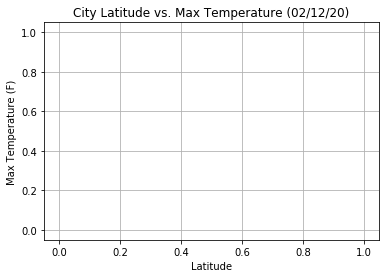

In [82]:
 # Build scatter plot for latitude vs. temperature
plt.scatter(lat, 
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

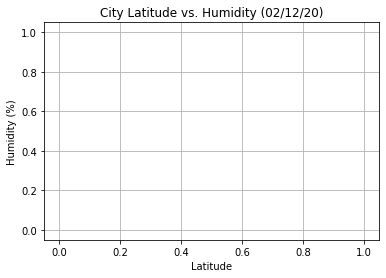

In [80]:
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

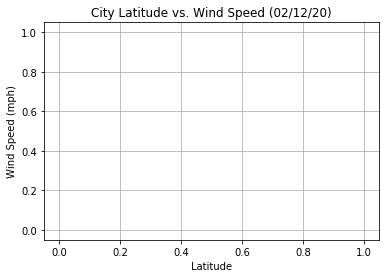

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [84]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [86]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8882298448471247


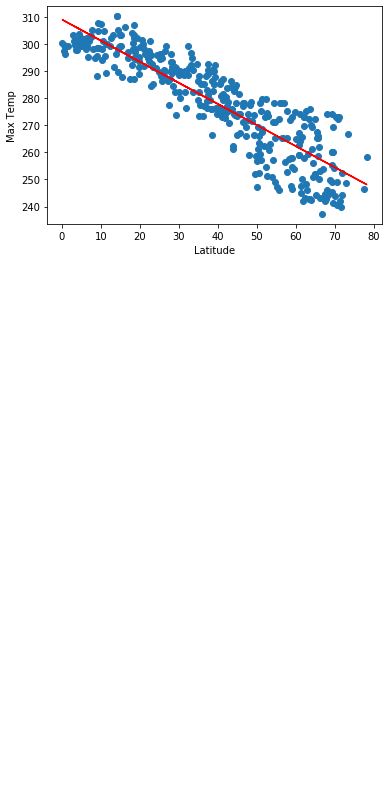

In [87]:
 # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4313352880757277


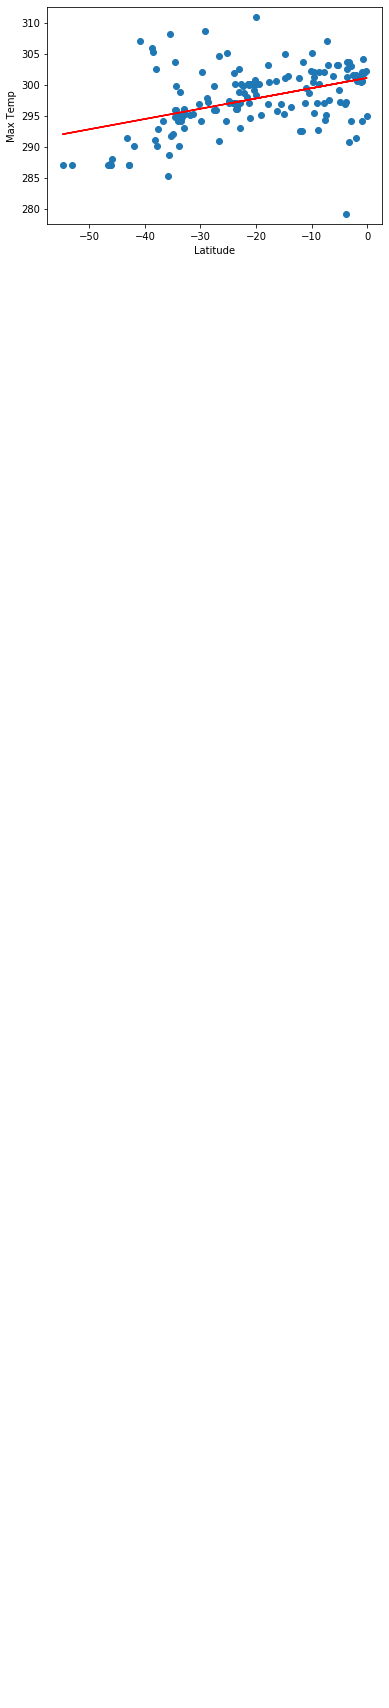

In [88]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37958700229754555


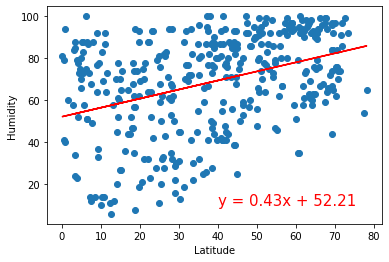

In [89]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13061547577476204


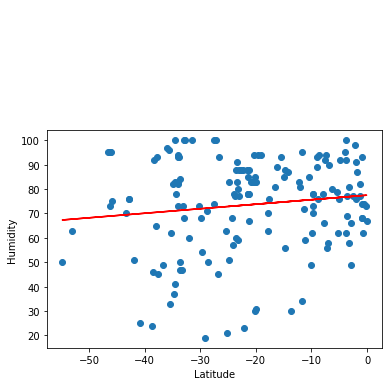

In [90]:
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


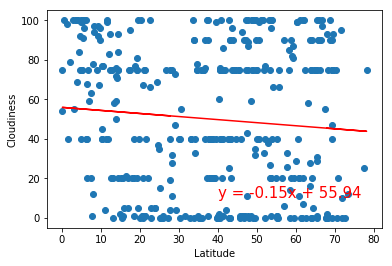

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


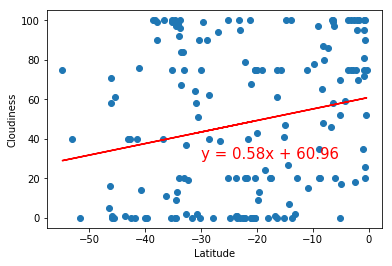

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08335586767386548


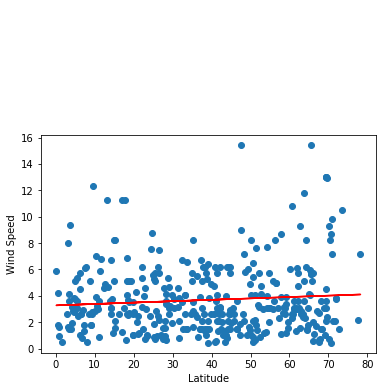

In [91]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.261050094118375


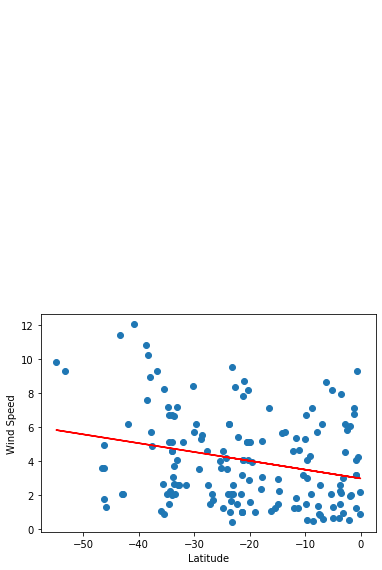

In [92]:
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))